In [1]:
import os
import json
import nltk
from nltk.corpus import stopwords
from typing import TypedDict


class CutData(TypedDict):
    '''type of the cuts json data file'''
    label: str
    start: float
    end: float
    video: str

def clean_word(word: str, chars: list[str], rep: str = '') -> str:
    for c in chars:
        word = word.replace(c,rep)
    return word

inv_chars = ['\n', ',', '.', '"', '-', '?', '!', '¿', '¡', '_']

# cuts data contains list of data for each cut json file
cuts_data: list[CutData] = []
# words contain list of words for each cut, excepting stopwords
words: dict[str, list[str]] = {}
# times contain lenght (s) for each cut
times: dict[str, float] = {}
# videos contains videos names
videos: set[str] = set()

# If not downloaded, run
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

dir = './data/'
for dirpath, dirnames, filenames in os.walk(dir):
    for f in filter(lambda fname: fname.endswith('.json') and not fname.startswith('alpha'), filenames): #lo de que no arranque con alpha es por los temporales de alphapose results, despues se puede sacar
        with open(dirpath + '/' + f) as datafile:
            data: CutData = json.load(datafile)
            cuts_data.append(data)
            words[data['video'].split('-')[-1] + '/' + f] = [w for w in clean_word(data['label'], inv_chars, '').lower().split(' ') if (w and w not in stop_words)]
            times[data['video'].split('-')[-1] + '/' + f] = (data['end'] - data['start'])
            videos.add(data['video'])

print('''La base de datos contiene:
    {} videos completos
    {} clips resultantes de dividir los videos de acuerdo a los subtítulos
    {} segundos de video'''.format(len(videos), len(cuts_data), sum(times.values())))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pdalbianco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


La base de datos contiene:
    59 videos completos
    13929 clips resultantes de dividir los videos de acuerdo a los subtítulos
    67231.35200000046 segundos de video


Estadísticas de la duración de los clips:

count    13050.000000
mean         5.151828
std          2.635130
min          0.450000
25%          3.300000
50%          4.590000
75%          6.390000
max         25.390000
dtype: float64

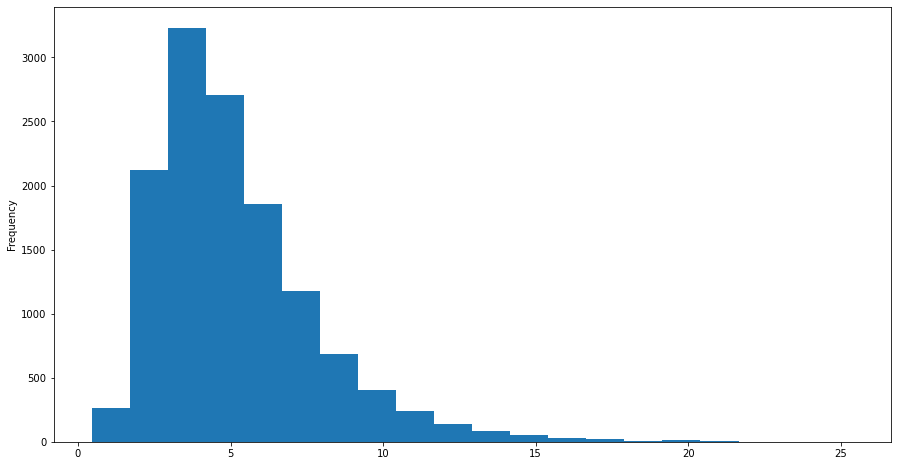

In [2]:
import pandas as pd
from IPython.display import display

times_s = pd.Series(times)
display(times_s.describe())
out = times_s.plot.hist(bins=20,figsize=(15,8))

Estadísticas de cantidad de palabras por clip:

count    13050.000000
mean         4.740230
std          1.793231
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         12.000000
dtype: float64

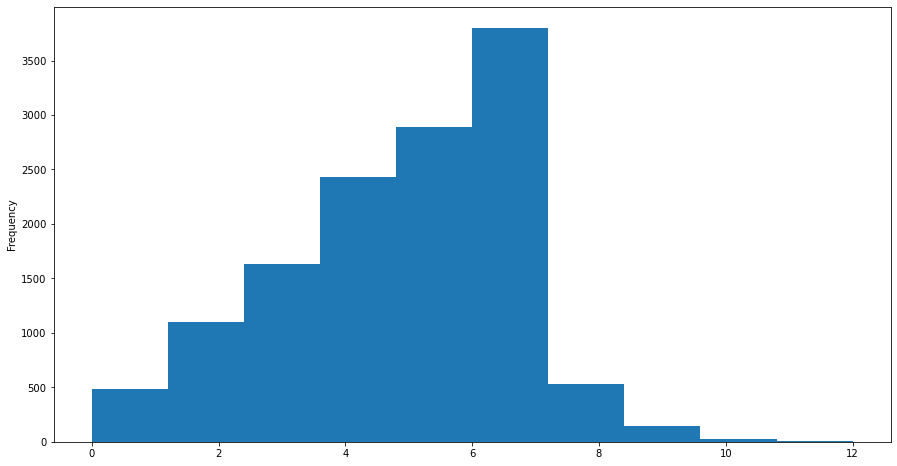

In [3]:
words_s = pd.Series({k: len(v) for k, v in words.items()})
display(words_s.describe())
out = words_s.plot.hist(figsize=(15,8))

Estadísticas acerca de frecuencia de palabras entre todos los clips:

count    12765.000000
mean         4.846063
std         15.260463
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        549.000000
dtype: float64

<AxesSubplot:>

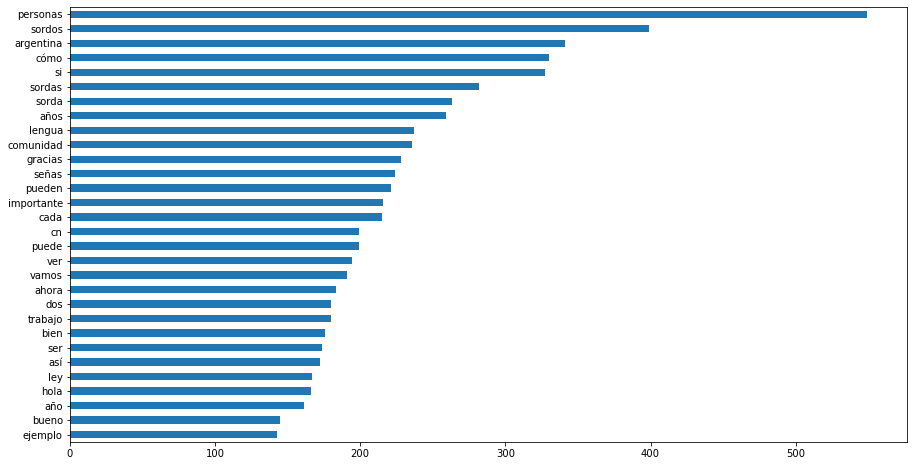

In [4]:
from collections import Counter

total_words = [item for sublist in words.values() for item in sublist]
word_count = Counter(total_words)

total_words_s = pd.Series(word_count).sort_values(ascending=False)
display(total_words_s.describe())
display(total_words_s.iloc[:30].sort_values().plot.barh(figsize=(15,8)))

count    51879.000000
mean         1.192390
std          2.074803
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
dtype: float64

<AxesSubplot:>

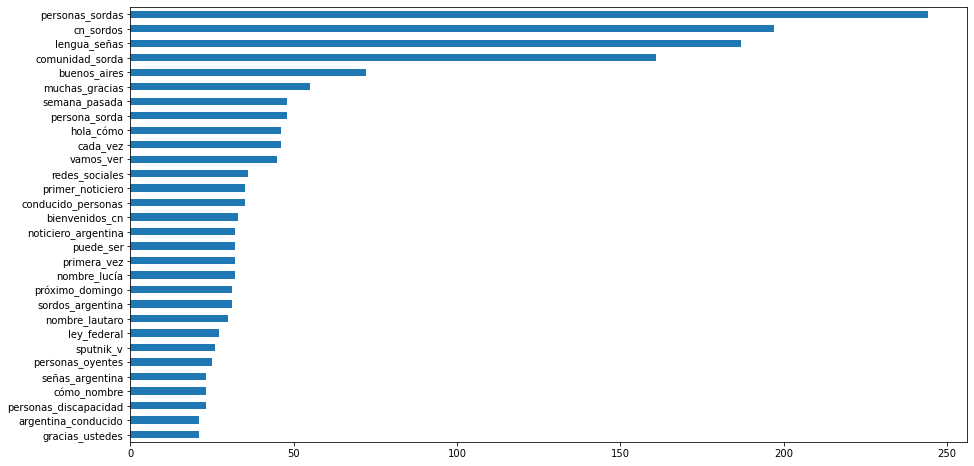

In [5]:
total_bigrams = ['_'.join(total_words[i:i + 2]) for i in range(len(total_words))]
bigram_count = Counter(total_bigrams)

total_bigrams_s = pd.Series(bigram_count).sort_values(ascending=False)
display(total_bigrams_s.describe())
display(total_bigrams_s.iloc[:30].sort_values().plot.barh(figsize=(15,8)))

count    59093.000000
mean         1.046824
std          0.478351
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         35.000000
dtype: float64

<AxesSubplot:>

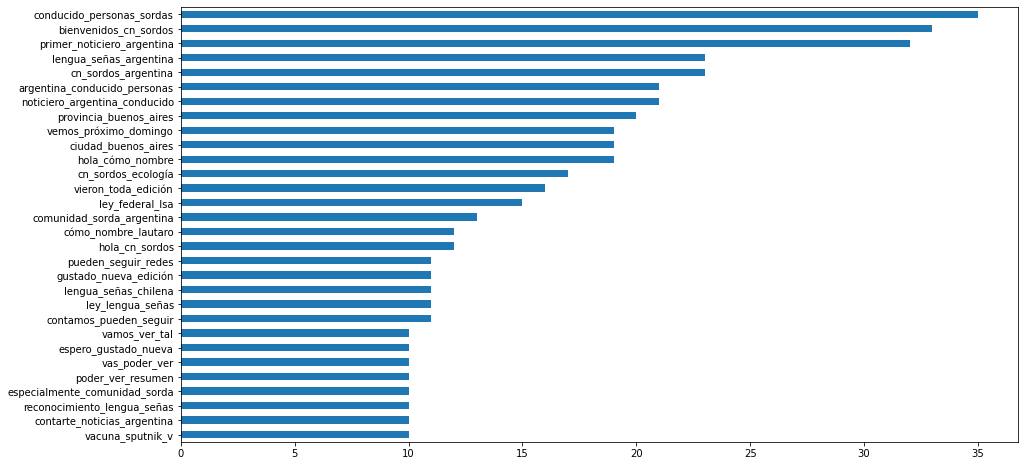

In [6]:
total_trigrams = ['_'.join(total_words[i:i + 3]) for i in range(len(total_words))]
trigram_count = Counter(total_trigrams)

total_trigrams_s = pd.Series(trigram_count).sort_values(ascending=False)
display(total_trigrams_s.describe())
display(total_trigrams_s.iloc[:30].sort_values().plot.barh(figsize=(15,8)))